<h1>Analyst: Alanis Danica P. Concha</h1>
<h2>BSIT 3C // ACTIVITY 1 DENGUE</h2>
<hr>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('Datasets\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1>QUESTION: What can we observe about the Dengue Cases across regions?</h1>

In [14]:
Regional = dengue.groupby(["Region"])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [15]:
Regional

,Region,Dengue_Deaths,Dengue_Cases
0,BARMM,332,11537
1,CAR,1008,30582
2,NCR,4008,115966
3,Region I,157,59066
4,Region II,193,45141
5,Region III,482,131064
6,Region IV-A,652,163029
7,Region IV-B,130,30849
8,Region IX,532,47781
9,Region V,185,22167


<h2>Insight 1: In this Data it shows that the region that has the highest dengue cases is in Region-4A, because this is a very populated area and also this is a urbanized area. </h2>
<h2>Insight 2: It shows also the lowest dengue cases is in the Region V, if we compared Region 5 to Region 4A we can say that the Region 5 is less crowded than the Region 4A </h2>

<hr>

<h1>In this Data what can you observe in the mortality rates in every region?</h1>

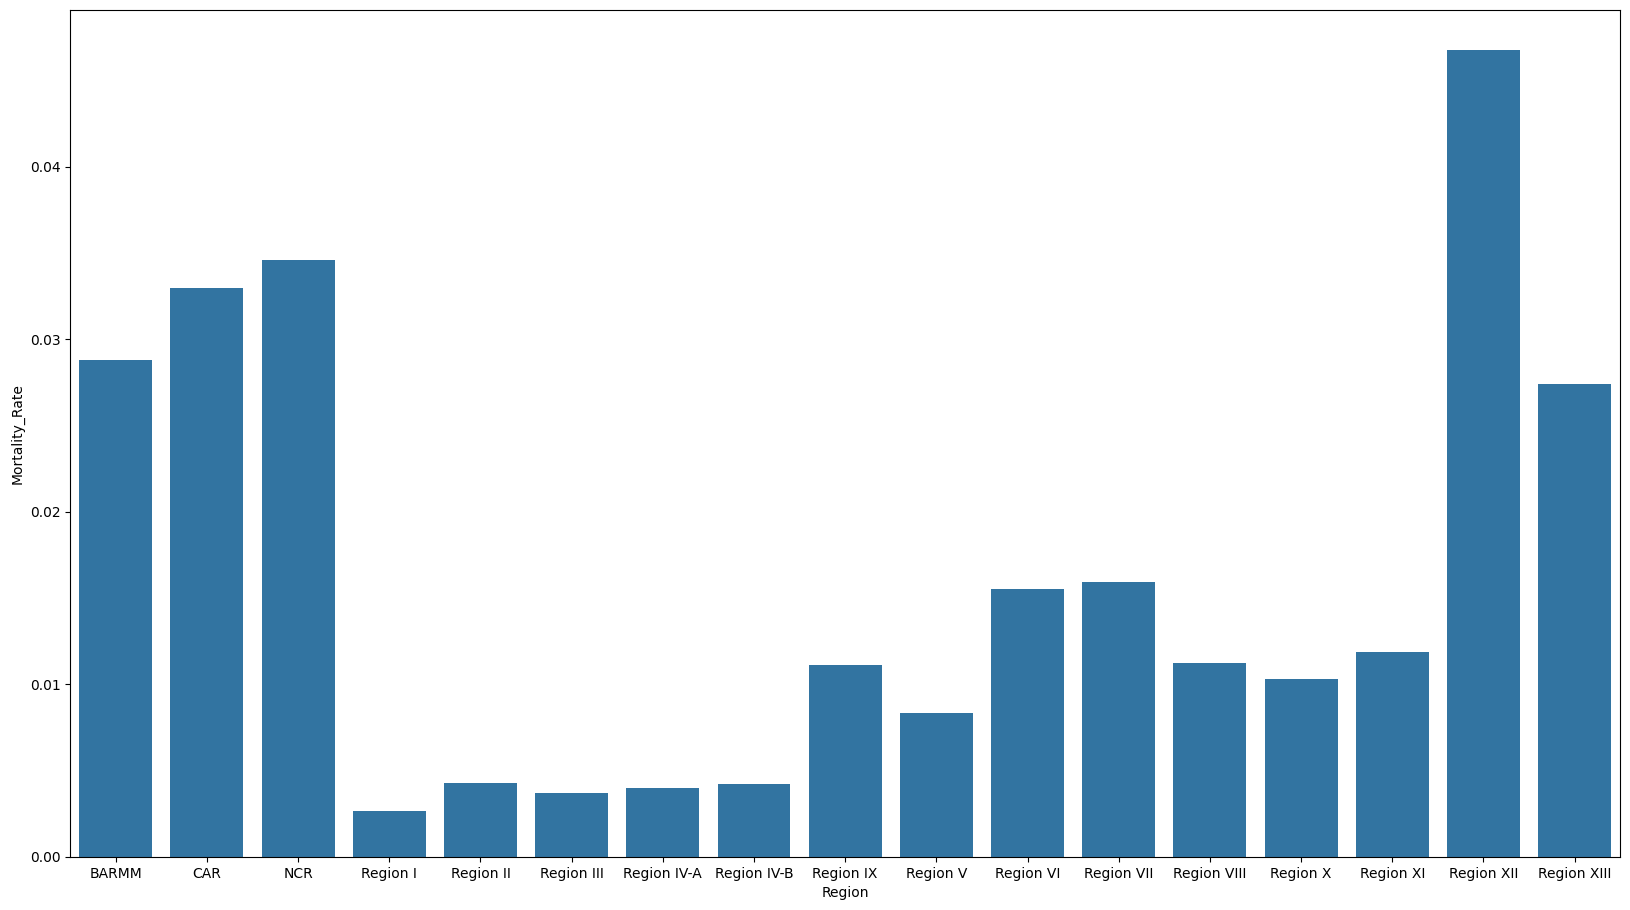

In [16]:
import matplotlib.pyplot as plt

Regional_Death = dengue.groupby('Region')[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()
Regional_Death["Mortality_Rate"] = Regional_Death["Dengue_Deaths"] / Regional_Death["Dengue_Cases"]
visual1 = sns.barplot(data=Regional_Death, x="Region",y="Mortality_Rate")
plt.gcf().set_size_inches(20,11)
plt.show()

<h2>Insight 3: Based on this data it shows that the highest mortality rates is in Region XII meaning many people died in this region compared to the people that has dengue cases. </h2>

<h2>Insight 4: We can see that Region I, Region II, Region III, Region IV-A and Region IV-B has the smallest rate of mortality. </h2>

<h1>QUESTION: What is the five most likely has the high rate in mortality?</h1>
<h2>Insight 5: The five Region that mostly has the high rate of mortality is BARMM, CAR, NCR, RGION XII, and REGION XIII. This is because they has a high population rate and urbanization or Sometimes some people has lack of awareness or early detection.</h2>

<hr>

<h1>QUESTION: What is the highest and smallest rate of dengue deaths in year 2016</h1>

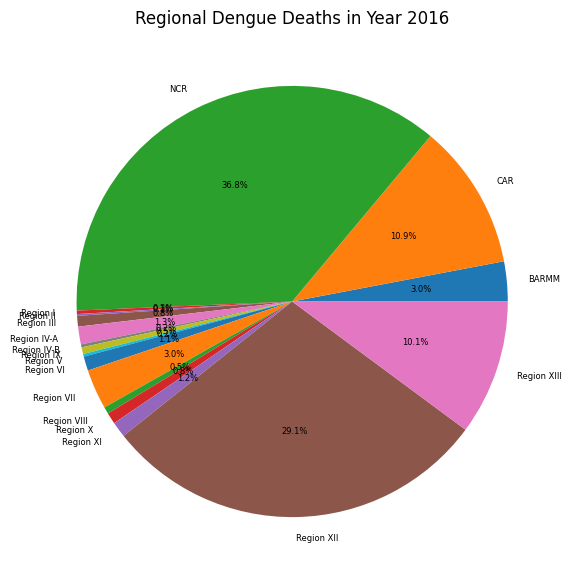

In [17]:

dengue_2016 = dengue[dengue['Year'] == 2016]

region_deaths_2016 = dengue_2016.groupby('Region')['Dengue_Deaths'].sum()

plt.figure(figsize=(10,7))
plt.pie(region_deaths_2016,
        labels = region_deaths_2016.index,
        autopct = '%1.1f%%',
        textprops={'fontsize':6},
        # startangle = 90 
       )
plt.gcf().set_size_inches(10,7)
plt.title('Regional Dengue Deaths in Year 2016')
plt.show()


<h2>Insight 6: As we can see this is the death record of dengue deaths in year 2016, NCR has the highest rate of deaths in year 2016,second to the highest is in the region 12.</h2>
<h2>Insight 7: The Region 4B is the smallest rate of death in 2016 while Region 1, Region 2  and Rgion 5 stays 2nd to smallest  rate of deaths in that year. </h2>

<hr>

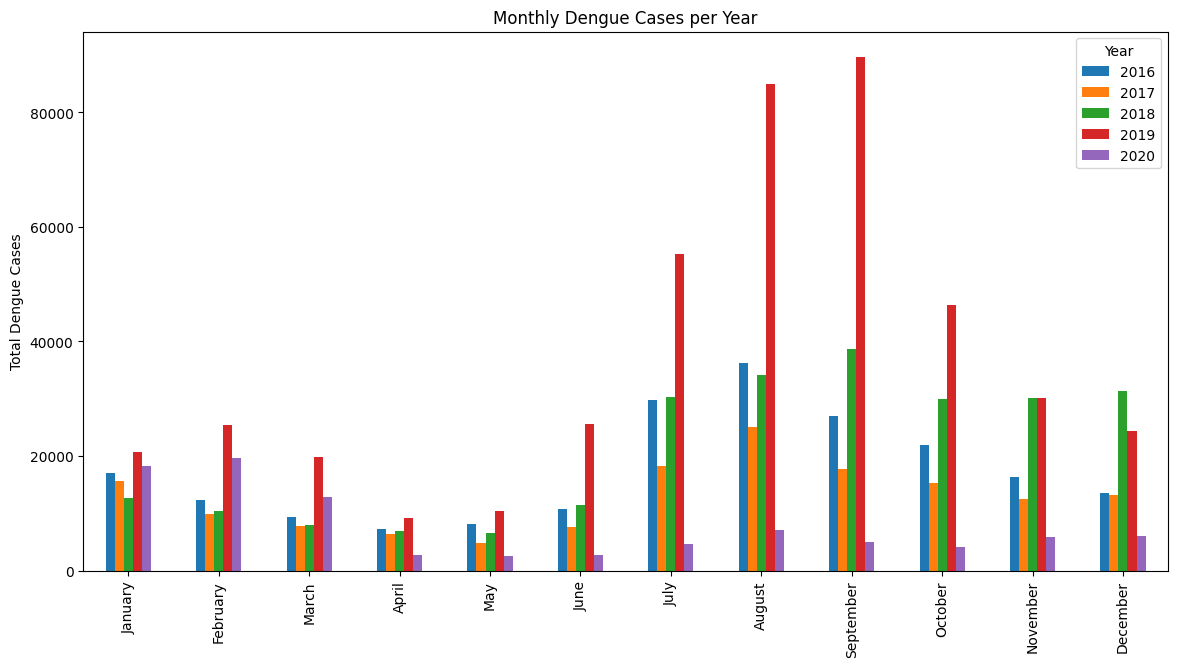

In [18]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
dengue_grouped = dengue.groupby(['Month', 'Year'])['Dengue_Cases'].sum().reset_index()
dengue_pivot = dengue_grouped.pivot(index='Month', columns='Year', values='Dengue_Cases')

dengue_grouped['Month'] = pd.Categorical(dengue_grouped['Month'], categories=month_order, ordered=True)
dengue_sorted = dengue_grouped.sort_values('Month')

dengue_pivot.index = pd.Categorical(dengue_pivot.index, categories=month_order, ordered=True)
dengue_pivot = dengue_pivot.sort_index()

dengue_pivot.plot(kind='bar', figsize=(14, 7))
plt.ylabel('Total Dengue Cases')
plt.title('Monthly Dengue Cases per Year')
plt.show()

<h1>QUESTION: What month has the highest and lowest cases every</h1>

<h2>Insight 8: In year 2016 the month of August has the highest number of cases in of Dengue. Also we can see that in the month of April 2016 is the smallest cases of Dengue.</h2>
<h2>Insight 9: When year 2017 comes the month of August is still has the highest cases of dengue in that year.and the lowest cases is in May.</h2>
<h2>Insight 10: In year 2018 the month that has the highest cases of dengue is in September. And has the least in the  month of May.</h2>
<h2>Insight 11: We can observe that July and November has the same rate of cases in in the year of 2018. </h2>
<h2>Insight 12: The highest Dengue cases month in year 2019 is September followed by the month of August. And the month that has the least number of cases in April.</h2>
<h2>Insight 13: In year 2020 the month that has the highest dengue cases is February and the least is in the month of May and June also the April.</h2>

<h1>QUESTION: What can we notice in the Plot?</h1>

<h2>Insight 14: If we compared 2016,2017,2018,2019 and 2020, The year that has the highest total of cases is in the year 2019. And the Year that has the lowest rate is in 2020. </h2>
<h2>Insight 15: The year 2016 and 2018 diddn't differ mugh in result, they are quite similar rates.</h2>